In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Algerial_forest_Updated.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.drop(['month','day','year'],axis=1,inplace=True)

In [6]:
df['Classes']=df['Classes'].str.strip()

In [7]:
df['Classes']=np.where(df['Classes']=='not fire',0,1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
#dividing independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [12]:
#feature selection using co relation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

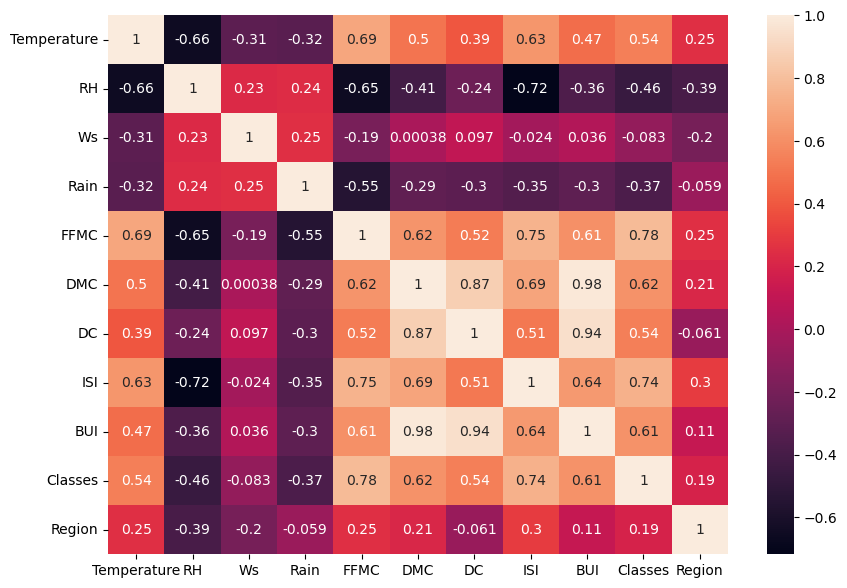

In [13]:
#check multicolinerity
plt.figure(figsize=(10,7))
cor=X_train.corr()
sns.heatmap(cor,annot=True)

In [14]:
# this is the function which will give you the answer that if that feature is corelated or not
def corelation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
corr_fea=corelation(X_train,0.85)

In [16]:
#drop the features where the coreation is more then .85
X_train.drop(corr_fea,axis=1,inplace=True)
X_test.drop(corr_fea,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [17]:
#standerdization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [18]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train after scaling')

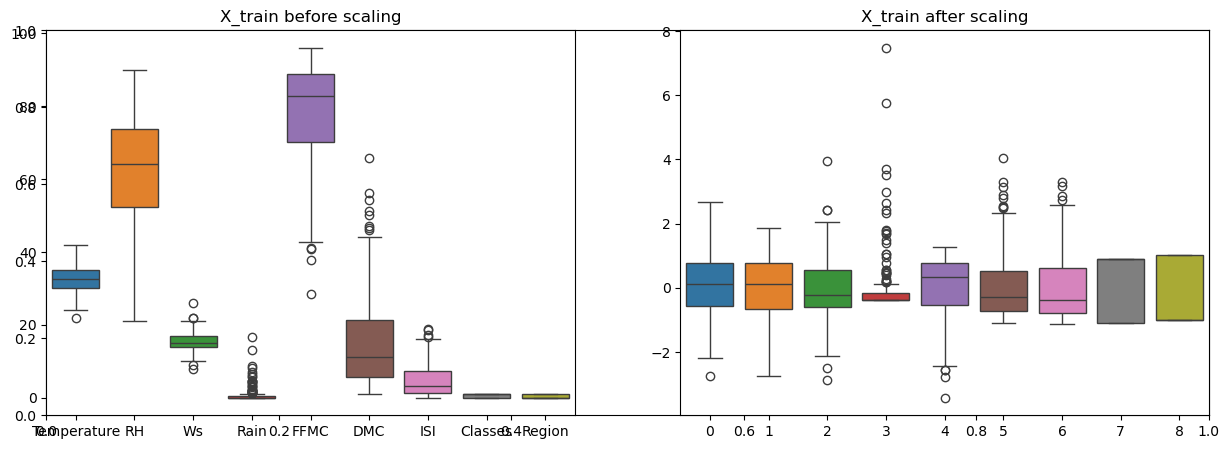

In [19]:
#box plots to understand effect of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

In [20]:
from sklearn.linear_model import LinearRegression


In [21]:
linReg=LinearRegression()
linReg.fit(X_train_scaled,y_train)

LinearRegression()

mae is:0.5468236465249978
r2 socre is:0.9847657384266951


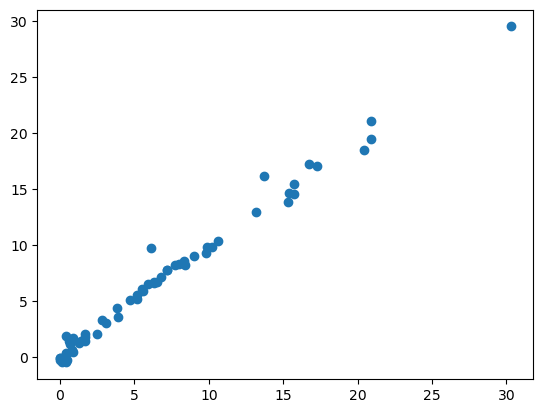

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=linReg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"mae is:{mae}")
print(f"r2 socre is:{score}")
plt.scatter(y_test,y_pred)

mae is:1.133175994914409
r2 socre is:0.9492020263112388


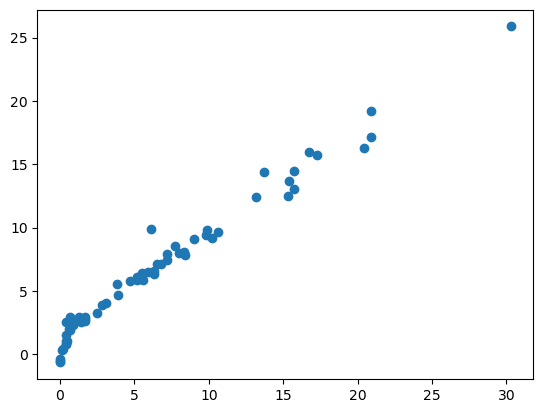

In [23]:
#lasso regression
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"mae is:{mae}")
print(f"r2 socre is:{score}")
plt.scatter(y_test,y_pred)

mae is:0.56423053401057
r2 socre is:0.9842993364555513


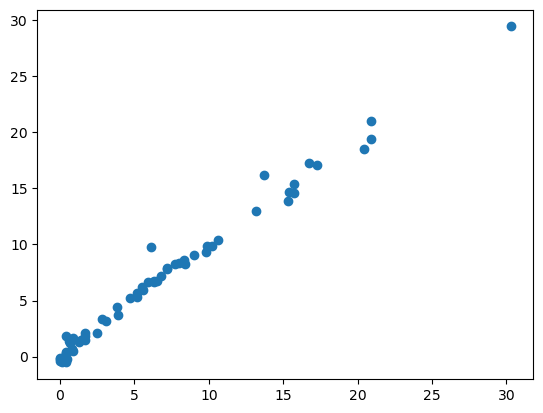

In [24]:
#regde regression
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"mae is:{mae}")
print(f"r2 socre is:{score}")
plt.scatter(y_test,y_pred)

mae is:1.8822353634896
r2 socre is:0.8753460589519703


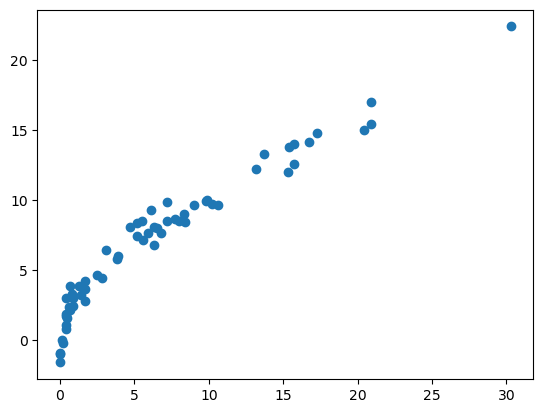

In [25]:
#elasticnet
#lasso regression
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"mae is:{mae}")
print(f"r2 socre is:{score}")
plt.scatter(y_test,y_pred)

In [26]:
#cross validation of lasso
from sklearn.linear_model import LassoCV
lassocv=LassoCV()
lassocv.fit(X_train_scaled,y_train)


LassoCV()

mae is:0.6199701158263432
r2 socre is:0.9820946715928275


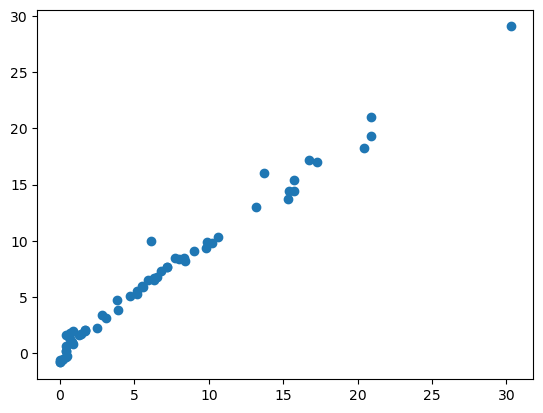

In [27]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"mae is:{mae}")
print(f"r2 socre is:{score}")


In [28]:
scaler

StandardScaler()

In [29]:
ridge

Ridge()

In [30]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))